In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn import preprocessing


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error


In [ ]:
class pred_analysis:
    def __init__(self):
      pass

    def details(self,df,target):                         #No return
      print("shape=",df.shape)
      print("\n")
      print("duplicates=")
      print(df[df.duplicated()].count())
      print("\n")
      print("Nulls=")
      print(df.isnull().sum())
      print("\n")
      print("balance=")
      print(df[target].value_counts())

    def balance(self,df,target):

      df1=df[df[target]==0]
      df2=df[df[target]==1]

      plt.bar(["0","1"],[df1.shape[0],df2.shape[0]])
      plt.ylabel("Count of patients")
      plt.title("Unbalanced dataset")
      plt.show()

      mini=min(df[target].value_counts().values)
      maxi=max(df[target].value_counts().values)
      if len(df1)>len(df2):
        df1_new=resample(df1,random_state=42,replace=True,n_samples=mini)
        df=pd.concat([df1_new,df2])
        plt.bar(["0","1"],[df1_new.shape[0],df2.shape[0]])
        plt.ylabel("Count of patients")
        plt.title("Unbalanced dataset")
        plt.show()
      else:
        df2_new=resample(df2,random_state=42,replace=True,n_samples=mini)
        df=pd.concat([df1,df2_new])
        plt.bar(["0","1"],[df1.shape[0],df2_new.shape[0]])
        plt.ylabel("Count of patients")
        plt.title("Unbalanced dataset")
        plt.show()
      print("After Balancing=")
      print(df[target].value_counts())

      return df

    def preprocess(self,df,target):
      if "Unnamed: 0" in df.columns:
        df=df.drop("Unnamed: 0",axis=1)
      df.fillna(method="ffill",inplace=True)
      df.drop_duplicates(inplace=True)
      print("Preprocessing completed")
      return df

    def check_outliers(self,df):
      num_col=df.columns[df.dtypes!=object]
      for i in num_col:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

    def correlation_order(self,df,val):
      print(val)
      x=df.corr()[val].sort_values(ascending=False)[1:]
      plt.bar(x.index, x.values)
      plt.xticks(rotation=90)
      plt.xlabel("Features")
      plt.ylabel("Correlation with target")
      plt.title("Correlation")
      plt.show()


    def remove_outliers(self,df):
      num_col=df.columns[df.dtypes!=object]
      for i in num_col:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        med=df[i].median()
        df[i]=np.where((df[i]<q1-(1.5*iqr)) | (df[i]>q3+(1.5*iqr)),med,df[i])
      return df

    def encoder(self,df,lst):                                 #  No return
      for i in lst:
        df[i]=preprocessing.LabelEncoder().fit_transform(df[i])

    def data_split(self,df,target,size):
      X=df.drop(columns=[target])
      y=df[target]
      x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=42)
      print(f'Records in dataset: {df.shape[0]}')
      print(f'Records in train dataset: {x_train.shape[0]}')
      print(f'Records in test dataset: {x_test.shape[0]}')
      return (x_train,x_test,y_train,y_test)

    def metrics(self,y_test,res):
      print(f"Accuracy score={accuracy_score(y_test,res)*100}")
      print(f"precision={precision_score(y_test,res)}")
      print(f"Recall={recall_score(y_test,res)*100}")
      print(f"F1 score={f1_score(y_test,res)*100}")
      print(f"Confusion Matrix=")
      conf_matrix=confusion_matrix(y_test,res)
      sns.heatmap(conf_matrix,annot=True)
      plt.show()

    def model_execute(self,models,tup):
      x_train,x_test,y_train,y_test=tup
      for mod in models:
        clf=models[mod]
        clf.fit(x_train,y_train)
        res=clf.predict(x_test)
        print(f"{clf}")
        print("\n")
        self.metrics(y_test,res)

In [ ]:
df=pd.read_csv("/content/diabetes_combined_new.csv")
df.head()

,d_patient_id,d_name,m_age,d_gender,d_postoffice_name,d_pincode,d_districts_name,d_state_name,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_smoking_history,d_diabetes,d_risk_factor
0,1,shivani,80.0,female,abdullapuram,632010,vellore,tamilnadu,6.6,140,25.19,0,1,never,0,8
1,36,sunita,5.0,male,abiramam,623601,sivaganga,tamilnadu,5.8,85,15.10,0,0,no info,0,4
2,50,pooja,3.0,female,abiramapuram,600018,chennai,tamilnadu,6.5,100,19.27,0,0,no info,0,7
3,92,fooljhnah,44.0,female,abiviethiswaram,613706,thanjavur,tamilnadu,5.7,145,37.35,0,0,never,0,5
4,97,pooja,67.0,female,achalpuram,609101,cuddalore,tamilnadu,6.2,159,27.32,0,0,never,1,5


In [ ]:
obj = pred_analysis()

In [ ]:
target="d_diabetes"

In [ ]:
obj.details(df,target)

shape= (100000, 16)


duplicates=
d_patient_id             0
d_name                   0
m_age                    0
d_gender                 0
d_postoffice_name        0
d_pincode                0
d_districts_name         0
d_state_name             0
m_HbA1c_level            0
m_blood_glucose_level    0
m_bmi                    0
d_hypertension           0
d_heart_disease          0
d_smoking_history        0
d_diabetes               0
d_risk_factor            0
dtype: int64


Nulls=
d_patient_id             0
d_name                   0
m_age                    0
d_gender                 0
d_postoffice_name        0
d_pincode                0
d_districts_name         0
d_state_name             0
m_HbA1c_level            0
m_blood_glucose_level    0
m_bmi                    0
d_hypertension           0
d_heart_disease          0
d_smoking_history        0
d_diabetes               0
d_risk_factor            0
dtype: int64


balance=
0    91500
1     8500
Name: d_diabetes, dtype: int64


In [ ]:


df=obj.preprocess(df,target)

Preprocessing completed


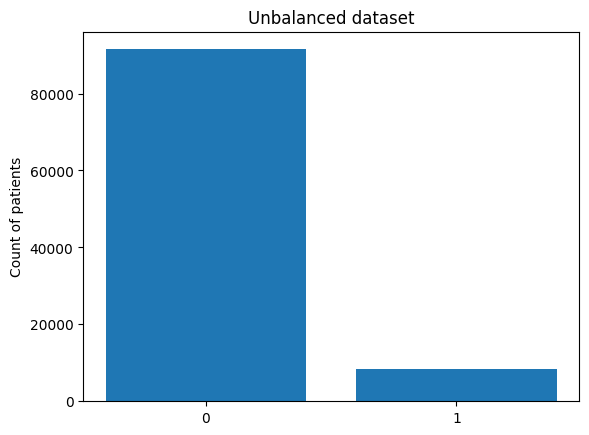

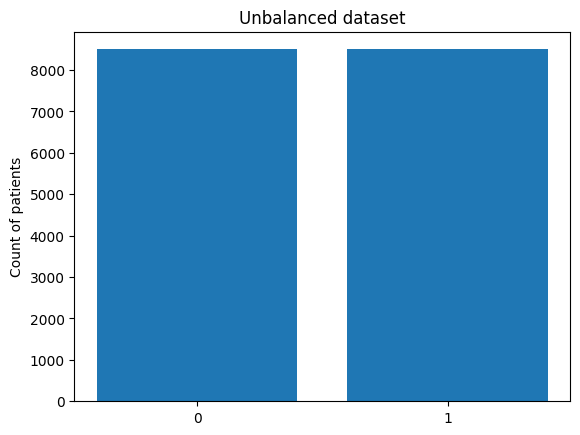

After Balancing=
0    8500
1    8500
Name: d_diabetes, dtype: int64


In [ ]:
df=obj.balance(df,target)  #Balance the Dataset

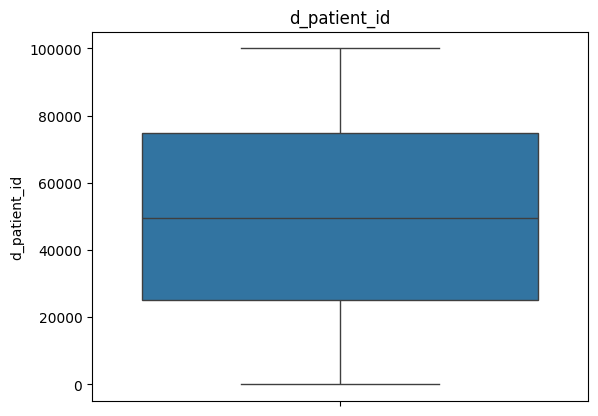

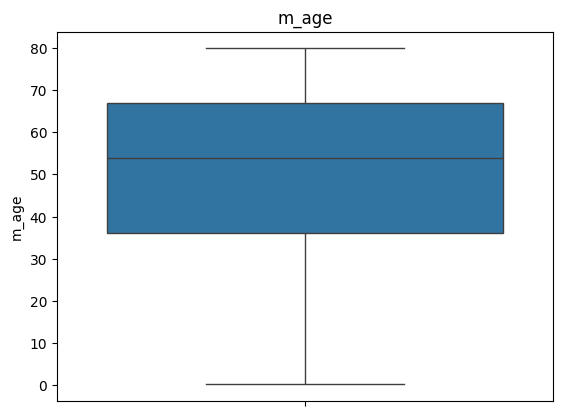

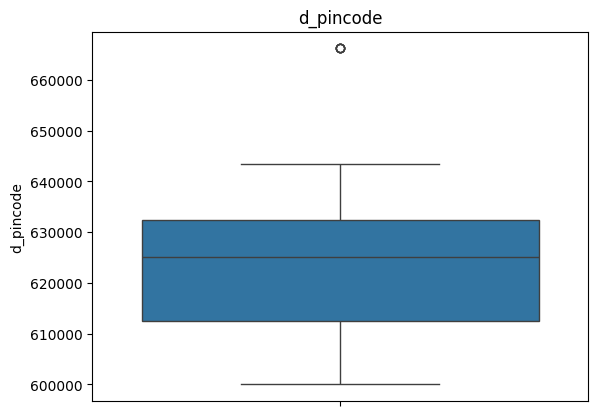

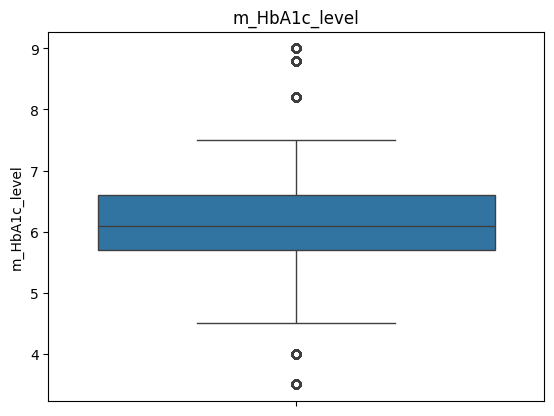

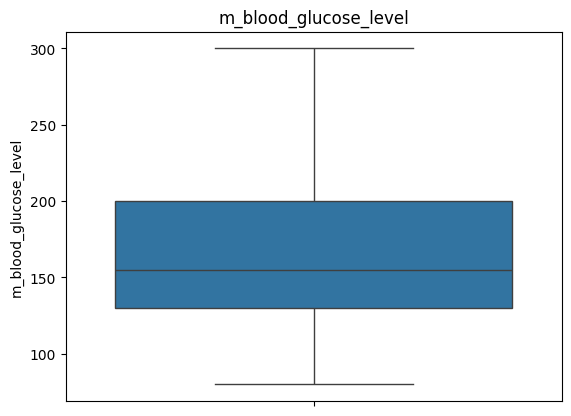

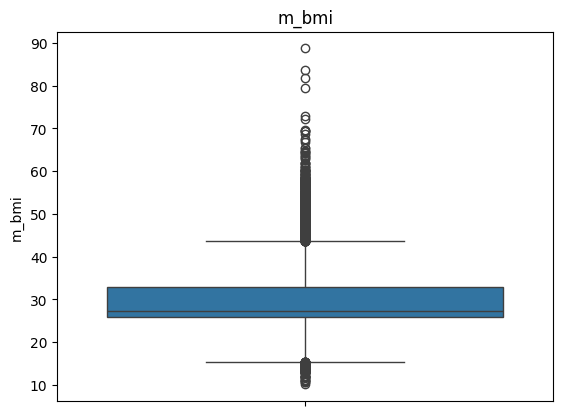

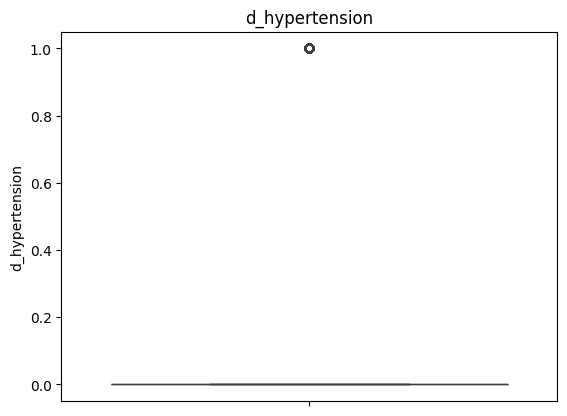

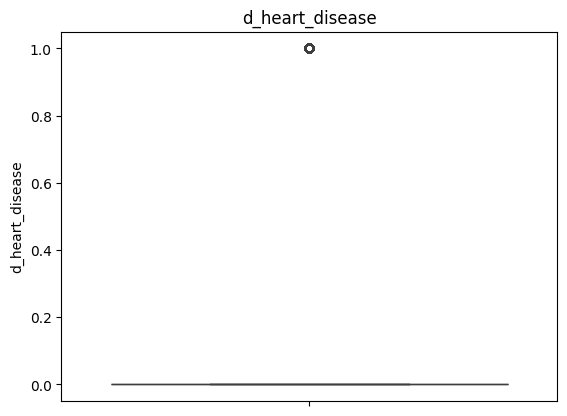

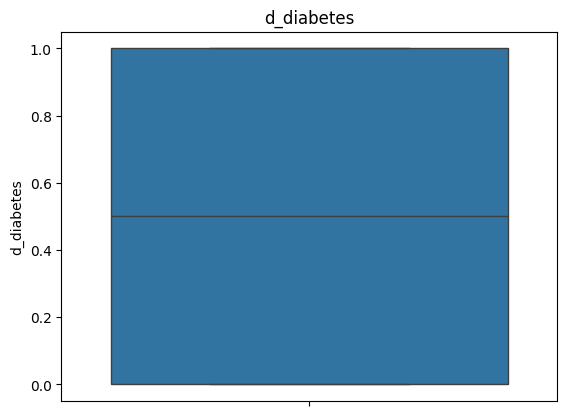

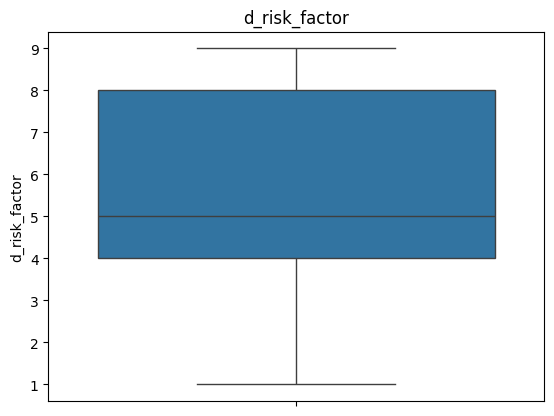

In [ ]:
obj.check_outliers(df)

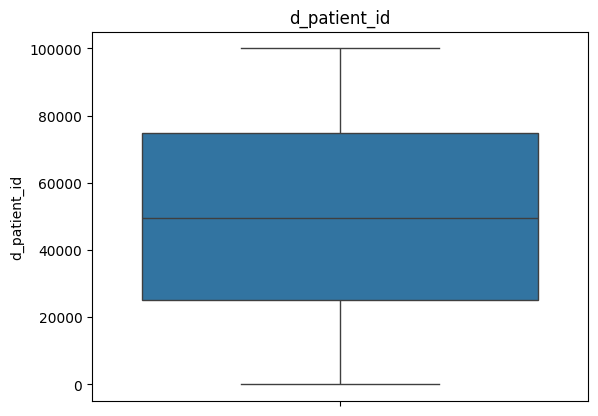

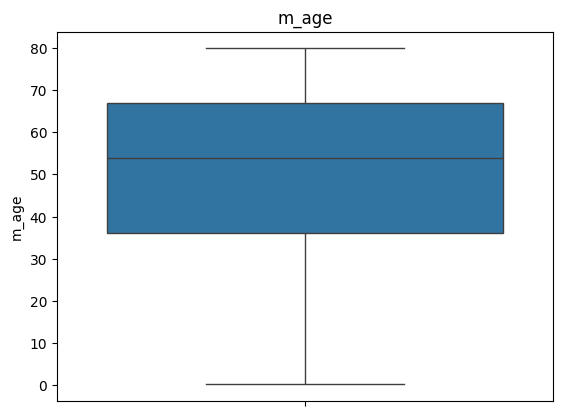

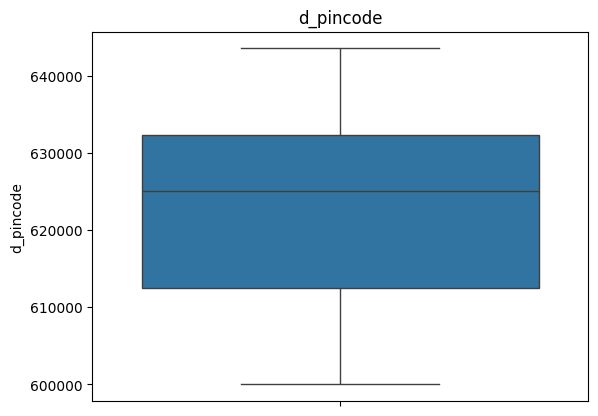

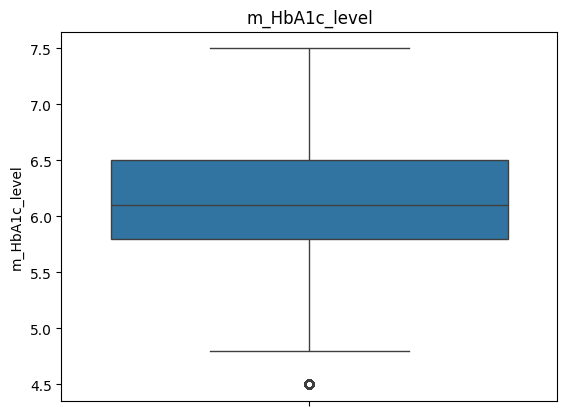

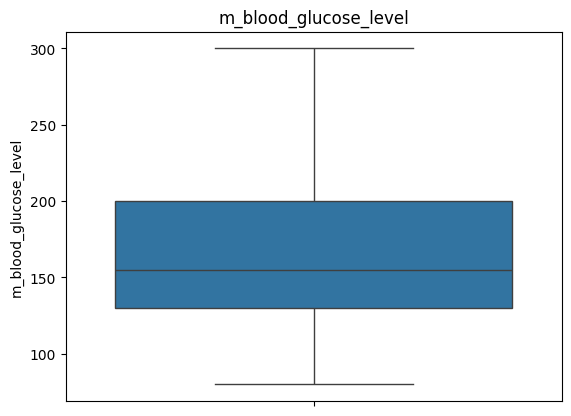

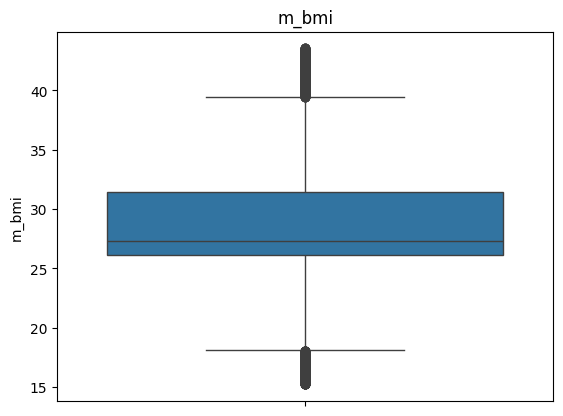

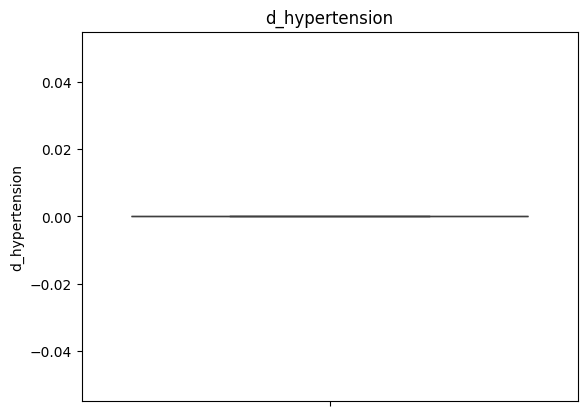

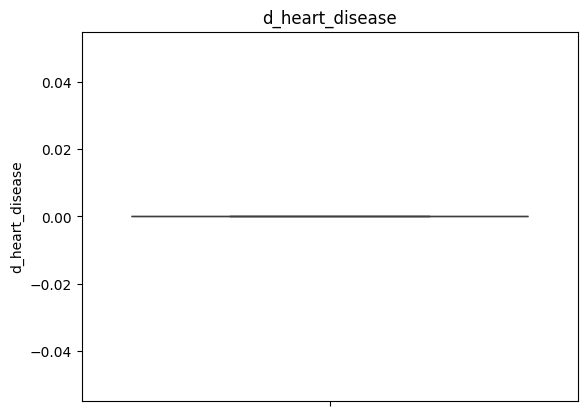

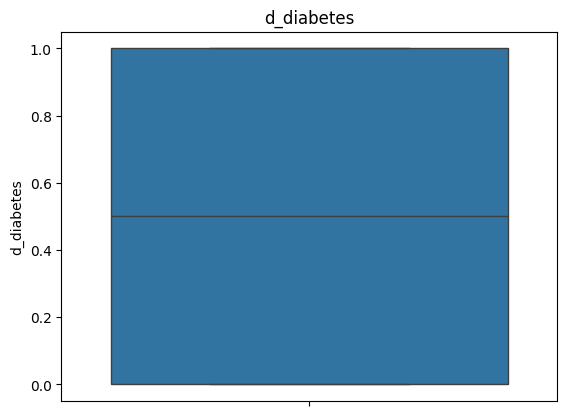

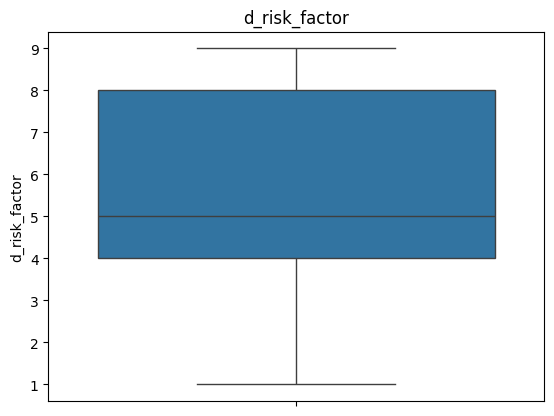

In [ ]:
cols = ['m_bmi']     #Remove Outliers
df=obj.remove_outliers(df)
obj.check_outliers(df)

In [ ]:
cols_to_be_encoded = ["d_smoking_history","d_gender"]
obj.encoder(df, cols_to_be_encoded)
df.head()

,d_patient_id,d_name,m_age,d_gender,d_postoffice_name,d_pincode,d_districts_name,d_state_name,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_smoking_history,d_diabetes,d_risk_factor
17278,24294.0,ajay kumar,6.0,2,pamani,614014.0,thanjavur,tamilnadu,4.8,90.0,18.96,0.0,0.0,4,0.0,1.0
942,35064.0,sonali,36.0,2,kallakurichi h o,606202.0,vellore,tamilnadu,5.8,90.0,27.32,0.0,0.0,4,0.0,4.0
83936,14551.0,rani,68.0,1,gandhi nagar east,632006.0,vellore,tamilnadu,6.1,130.0,28.29,0.0,0.0,2,0.0,1.0
59991,64623.0,manisha,11.0,1,tirumangalakudi,612102.0,thanjavur,tamilnadu,6.1,100.0,26.26,0.0,0.0,3,0.0,1.0
6849,50237.0,ajay kumar,24.0,1,thanjavur bazar,613001.0,thanjavur,tamilnadu,5.8,200.0,27.32,0.0,0.0,3,0.0,6.0


In [ ]:
obj.details(df,target)

shape= (17000, 16)


duplicates=
d_patient_id             354
d_name                   354
m_age                    354
d_gender                 354
d_postoffice_name        354
d_pincode                354
d_districts_name         354
d_state_name             354
m_HbA1c_level            354
m_blood_glucose_level    354
m_bmi                    354
d_hypertension           354
d_heart_disease          354
d_smoking_history        354
d_diabetes               354
d_risk_factor            354
dtype: int64


Nulls=
d_patient_id             0
d_name                   0
m_age                    0
d_gender                 0
d_postoffice_name        0
d_pincode                0
d_districts_name         0
d_state_name             0
m_HbA1c_level            0
m_blood_glucose_level    0
m_bmi                    0
d_hypertension           0
d_heart_disease          0
d_smoking_history        0
d_diabetes               0
d_risk_factor            0
dtype: int64


balance=
0.0    8500
1.0    8500
N

#Check whether data is linear or non-linear


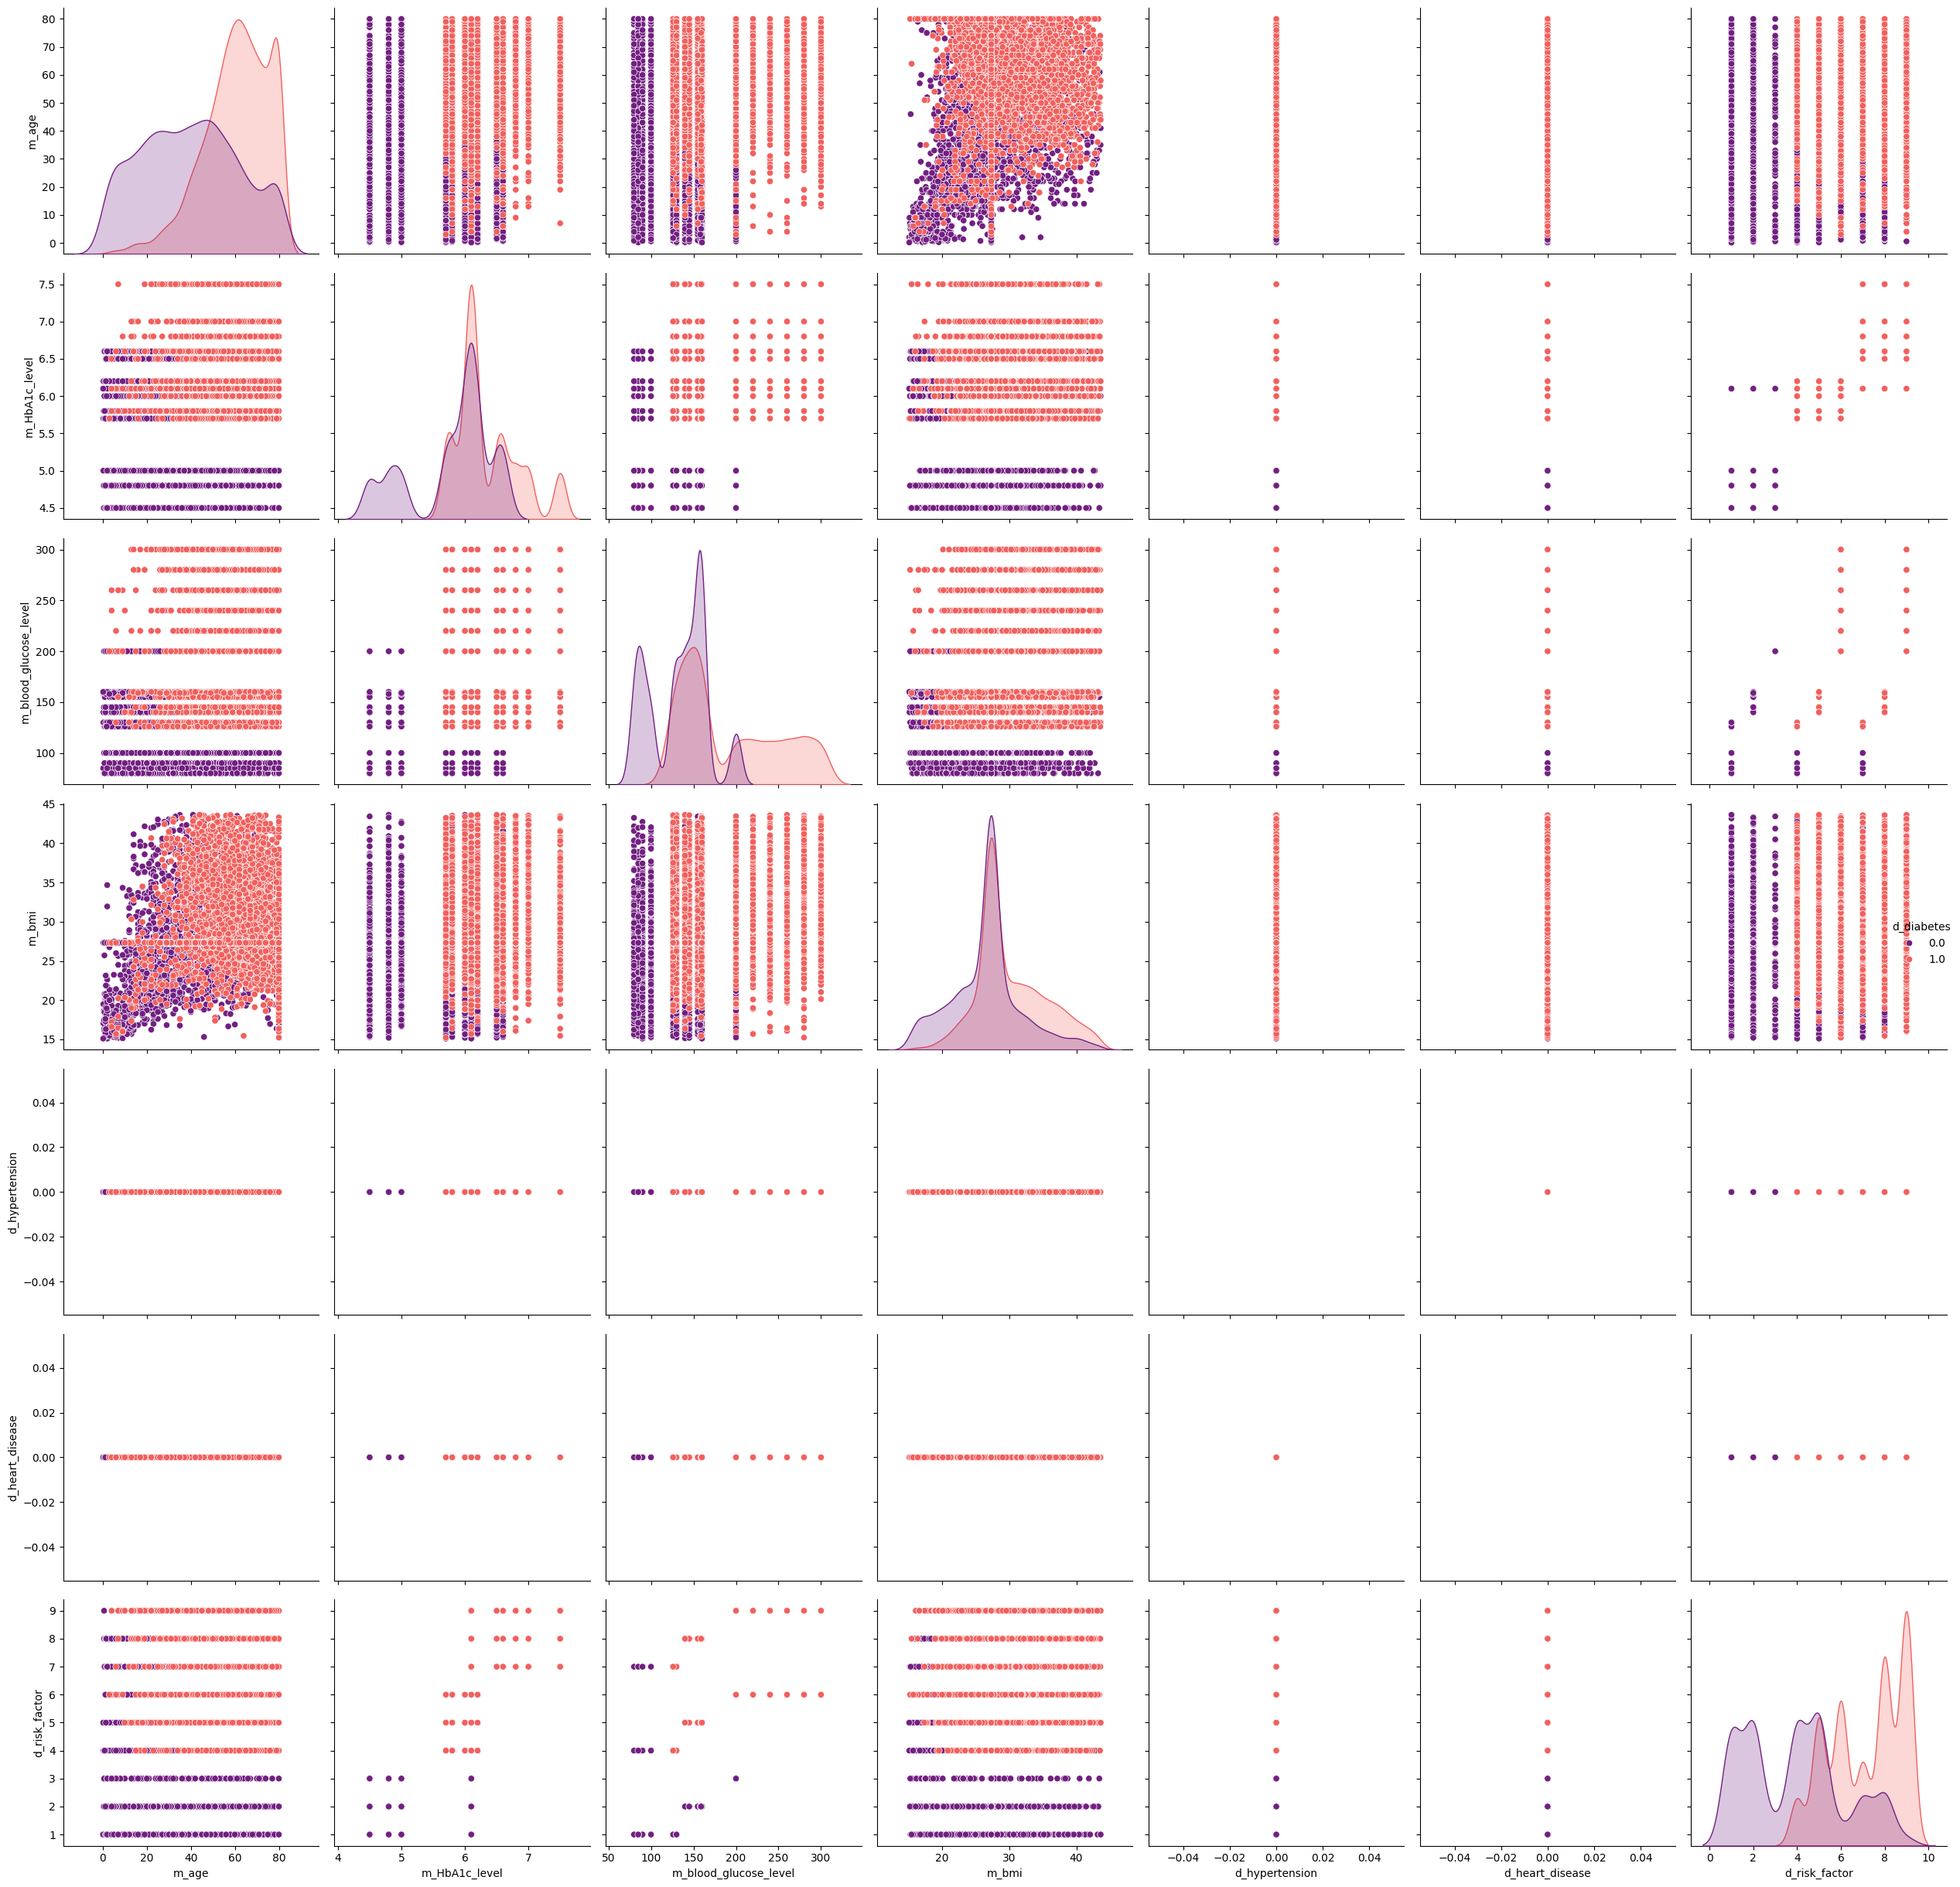

In [ ]:
num_cols = df.columns[df.dtypes!=object]
selected_features = [ 'm_age', 'm_HbA1c_level',
       'm_blood_glucose_level', 'm_bmi', 'd_hypertension', 'd_heart_disease','d_risk_factor',"d_diabetes"]
# sns.pairplot(df[selected_features],hue="d_diabetes", palette="magma", height=3.5)
# plt.tight_layout()


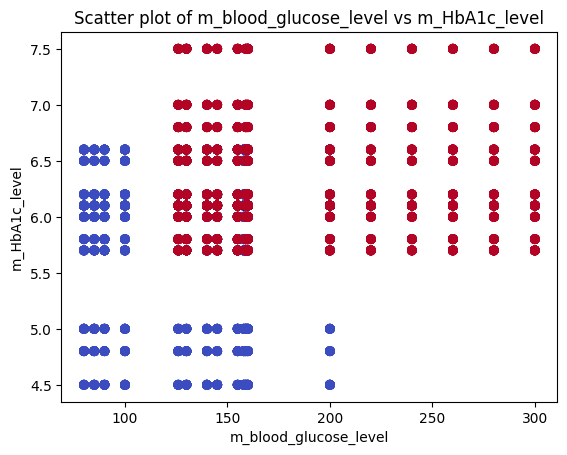

In [ ]:
plt.scatter(df['m_blood_glucose_level'], df['m_HbA1c_level'], c=df['d_diabetes'], cmap='coolwarm')
plt.xlabel('m_blood_glucose_level')
plt.ylabel('m_HbA1c_level')
plt.title('Scatter plot of m_blood_glucose_level vs m_HbA1c_level')
plt.show()

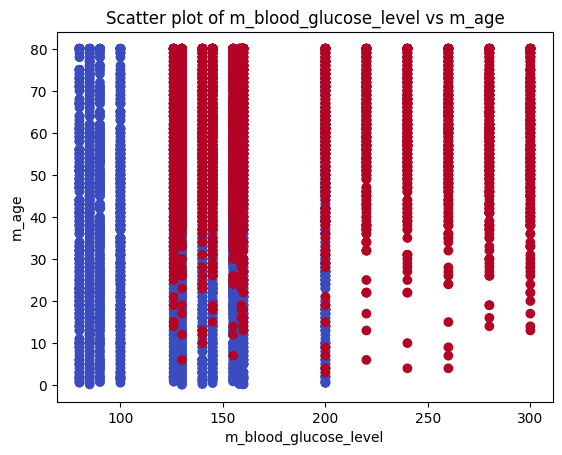

In [ ]:
plt.scatter(df['m_blood_glucose_level'], df['m_age'], c=df['d_diabetes'], cmap='coolwarm')
plt.xlabel('m_blood_glucose_level')
plt.ylabel('m_age')
plt.title('Scatter plot of m_blood_glucose_level vs m_age')
plt.show()

d_diabetes


<ipython-input-2-2dd0ad31726b>:65: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=df.corr()[val].sort_values(ascending=False)[1:]


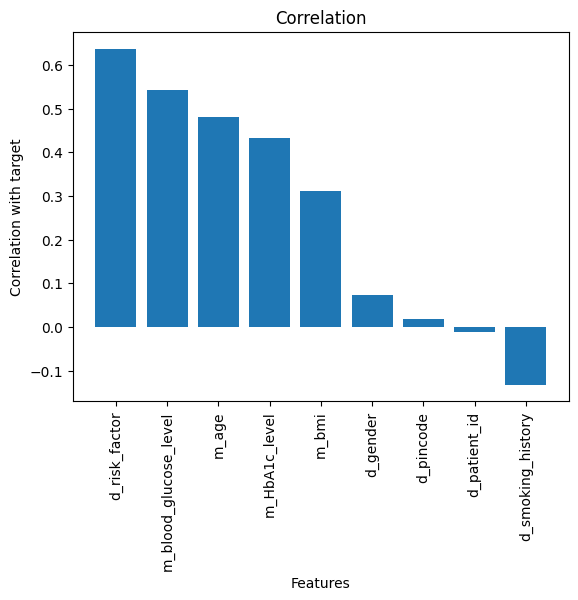

In [ ]:
obj.correlation_order(df,"d_diabetes")

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.head()

,d_patient_id,d_name,m_age,d_gender,d_postoffice_name,d_pincode,d_districts_name,d_state_name,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_smoking_history,d_diabetes,d_risk_factor
17278,24294.0,ajay kumar,6.0,2,pamani,614014.0,thanjavur,tamilnadu,4.8,90.0,18.96,0.0,0.0,4,0.0,1.0
942,35064.0,sonali,36.0,2,kallakurichi h o,606202.0,vellore,tamilnadu,5.8,90.0,27.32,0.0,0.0,4,0.0,4.0
83936,14551.0,rani,68.0,1,gandhi nagar east,632006.0,vellore,tamilnadu,6.1,130.0,28.29,0.0,0.0,2,0.0,1.0
59991,64623.0,manisha,11.0,1,tirumangalakudi,612102.0,thanjavur,tamilnadu,6.1,100.0,26.26,0.0,0.0,3,0.0,1.0
6849,50237.0,ajay kumar,24.0,1,thanjavur bazar,613001.0,thanjavur,tamilnadu,5.8,200.0,27.32,0.0,0.0,3,0.0,6.0


In [ ]:
df.drop(columns=["d_patient_id","d_pincode","d_smoking_history"],inplace=True)
df.drop(columns=df.columns[df.dtypes==object],inplace=True)

features = df.columns
features = features.delete(features.get_loc('d_diabetes'))
print(features)
df.head()

Index(['m_age', 'd_gender', 'm_HbA1c_level', 'm_blood_glucose_level', 'm_bmi',
       'd_hypertension', 'd_heart_disease', 'd_risk_factor'],
      dtype='object')


,m_age,d_gender,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_diabetes,d_risk_factor
17278,6.0,2,4.8,90.0,18.96,0.0,0.0,0.0,1.0
942,36.0,2,5.8,90.0,27.32,0.0,0.0,0.0,4.0
83936,68.0,1,6.1,130.0,28.29,0.0,0.0,0.0,1.0
59991,11.0,1,6.1,100.0,26.26,0.0,0.0,0.0,1.0
6849,24.0,1,5.8,200.0,27.32,0.0,0.0,0.0,6.0


Predictive Analysis

In [ ]:
x_train,x_test,y_train,y_test=obj.data_split(df,target,0.3)

Records in dataset: 17000
Records in train dataset: 11900
Records in test dataset: 5100


SVC


In [ ]:
x=StandardScaler()

X_train=x.fit_transform(x_train)
X_test=x.transform(x_test)
clf = SVC(kernel="rbf",gamma=0.05,C=1000)
clf.fit(X_train, y_train)
res=clf.predict(X_test)

In [ ]:
alpha=0.01                                             # Lasso regularisation for feature selection
lasso_model=Lasso(alpha=alpha)
lasso_model.fit(X_train,y_train)
y_pred=lasso_model.predict(X_test)

print(f"mse={mean_squared_error(y_test,y_pred)}")
featurezz=np.where(lasso_model.coef_!=0)[0]
coeff=lasso_model.coef_[lasso_model.coef_!=0]
print(featurezz)
print(features)
print(coeff)
print(f"Intercept={lasso_model.intercept_}")

# mse=0.11194638420538472
# [0 1 2 3 4 5 6]
# Index(['m_age', 'm_HbA1c_level', 'm_blood_glucose_level', 'm_bmi',
#        'd_hypertension', 'd_heart_disease', 'd_risk_factor'],
#       dtype='object')
# [0.11247907 0.00728974 0.11141026 0.04787144 0.0307686  0.01880673
#  0.19231793]
# Intercept=0.5015126050420168

mse=0.10670351644392558
[0 1 2 3 4 7]
Index(['m_age', 'd_gender', 'm_HbA1c_level', 'm_blood_glucose_level', 'm_bmi',
       'd_hypertension', 'd_heart_disease', 'd_risk_factor'],
      dtype='object')
[0.12376438 0.01545587 0.00658541 0.11272918 0.05199692 0.19102645]
Intercept=0.5024409295059559


Accuracy score=89.6078431372549
precision=0.8740657698056801
Recall=92.37756714060032
F1 score=89.82334869431642
Confusion Matrix=


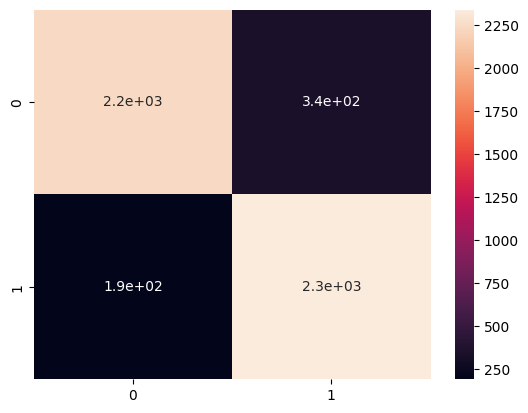

In [ ]:
obj.metrics(y_test,res)

In [ ]:
x_test.head()

,m_age,d_gender,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_risk_factor
28701,57.0,2,7.5,155.0,27.32,0.0,0.0,8.0
95331,12.0,1,5.8,158.0,15.46,0.0,0.0,5.0
21134,73.0,2,6.1,300.0,29.37,0.0,0.0,9.0
20484,24.0,1,6.0,90.0,32.06,0.0,0.0,4.0
88097,11.0,2,6.5,130.0,27.32,0.0,0.0,7.0


In [ ]:
y_test

28701    1.0
95331    0.0
21134    1.0
20484    0.0
88097    0.0
        ... 
80644    0.0
12732    1.0
24012    1.0
4703     0.0
32756    0.0
Name: d_diabetes, Length: 5100, dtype: float64

In [ ]:
params = {"C":[0.05,0.1,1,10,100,1000,5000,10000],
          "gamma":[1,0.1,0.05,0.01,0.001,0.0001,1e-5,1e-6],
          "kernel":['rbf']}

In [ ]:
grid = GridSearchCV(SVC(),params,refit=True,verbose=5)

In [ ]:
# grid.fit(X_train,y_train)   # find the best value of C and Gamma

In [ ]:
# grid.best_estimator_

In [ ]:
# pred=grid.predict(X_test)
# obj.metrics(pred,y_test)

LogisticRegression()


Accuracy score=87.0615034168565
precision=0.8631006346328196
Recall=87.74193548387098
F1 score=87.0201096892139
Confusion Matrix=


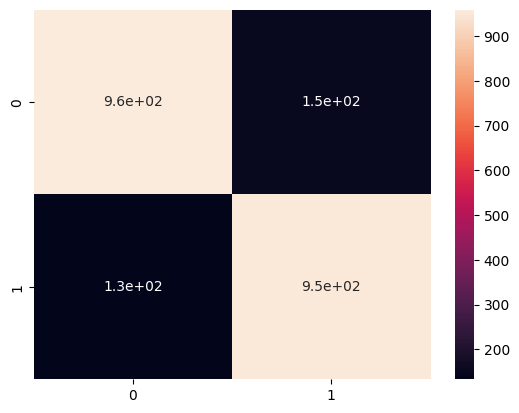

RandomForestClassifier()


Accuracy score=89.65831435079727
precision=0.901685393258427
Recall=88.7557603686636
F1 score=89.45657222480261
Confusion Matrix=


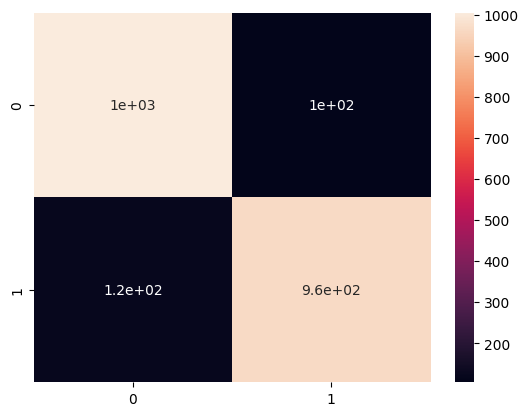

DecisionTreeClassifier()


Accuracy score=87.83599088838268
precision=0.888045540796964
Recall=86.26728110599078
F1 score=87.51753155680225
Confusion Matrix=


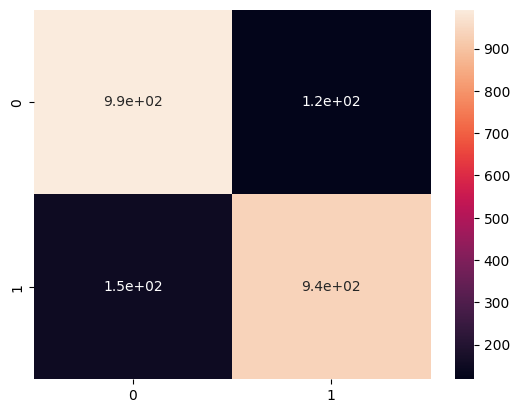

KNeighborsClassifier()


Accuracy score=87.0615034168565
precision=0.8585496866606983
Recall=88.38709677419355
F1 score=87.10263396911898
Confusion Matrix=


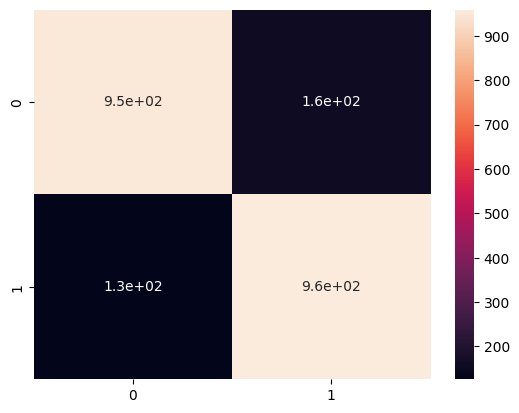

GaussianNB()


Accuracy score=85.74031890660592
precision=0.8662239089184061
Recall=84.14746543778801
F1 score=85.36699392239363
Confusion Matrix=


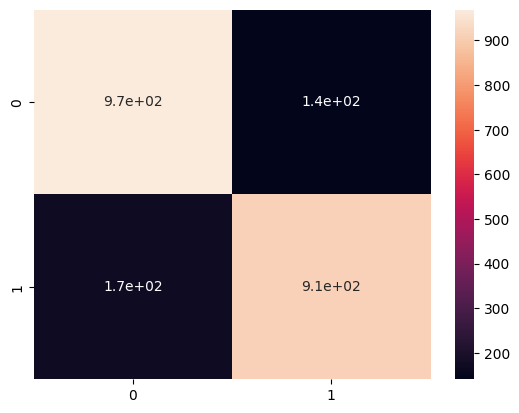

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)


Accuracy score=86.1503416856492
precision=0.8632558139534884
Recall=85.52995391705069
F1 score=85.92592592592592
Confusion Matrix=


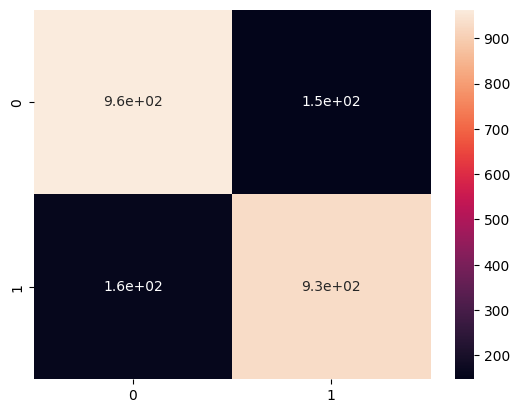

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Accuracy score=90.75170842824602
precision=0.9090909090909091
Recall=90.32258064516128
F1 score=90.61488673139159
Confusion Matrix=


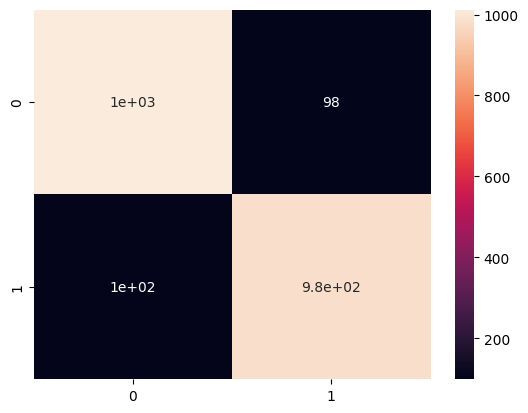

In [ ]:
dec=DecisionTreeClassifier()
models={"Logreg":LogisticRegression(),"Rf":RandomForestClassifier(),"dt":dec,"knn":KNeighborsClassifier(),"Naive Bayes": GaussianNB(),
        "ada":AdaBoostClassifier(base_estimator=dec,n_estimators=50,random_state=42),"xgb":XGBClassifier()}
obj.model_execute(models,(x_train,x_test,y_train,y_test))